In [5]:
import pandas as pd
import glob
import os

# Define the folder path
folder_path = '/Users/user/Downloads/Women/'

# Get all Excel files in the folder
excel_files = glob.glob(os.path.join(folder_path, '*.xlsx'))

# Read and concatenate all Excel files
df_list = [pd.read_excel(file) for file in excel_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Filter by position and age
positions = ['CB', 'LCB', 'RCB']
filtered_df = combined_df[
    combined_df['Position'].isin(positions) &
    (combined_df['Age'].between(22, 30))
]

filtered_df


,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,...,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 90.1,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
21,C. Ashe,Djurgården,Djurgården,RCB,23.0,0,NaN,9,866,0,...,NaN,3.33,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
24,J. Bækkelund,Brommapojkarna,Brommapojkarna,LCB,24.0,0,NaN,9,865,1,...,NaN,0.73,NaN,NaN,0.21,0.00,0.0,0.10,0,0.0
35,J. Harrysson,Växjö,Växjö,LCB,25.0,0,NaN,9,844,0,...,NaN,1.28,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
48,S. Ojanen,Vittsjö,Vittsjö,LCB,24.0,0,NaN,9,832,1,...,NaN,1.41,NaN,NaN,0.11,0.00,0.0,0.00,0,0.0
51,J. Olsson,Brommapojkarna,Brommapojkarna,RCB,28.0,0,NaN,9,825,0,...,NaN,1.42,NaN,NaN,0.44,0.11,0.0,2.95,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9244,J. Grönlund,HJK,HJK,RCB,28.0,0,NaN,3,289,0,...,NaN,1.56,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
9255,E. Degerstedt,Åland United,Åland United,LCB,22.0,0,NaN,3,203,0,...,NaN,0.44,NaN,NaN,1.33,0.00,0.0,0.00,0,0.0
9291,V. Haikala,JyPK,JyPK,LCB,22.0,0,NaN,1,96,0,...,NaN,15.00,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0
9296,J. Grönlund,PK-35 Helsinki,PK-35 Helsinki,RCB,28.0,0,NaN,1,93,0,...,NaN,0.00,NaN,NaN,0.00,0.00,0.0,0.00,0,0.0


Skipping file /Users/user/Downloads/Women/~$Japan.xlsx due to error: File is not a zip file


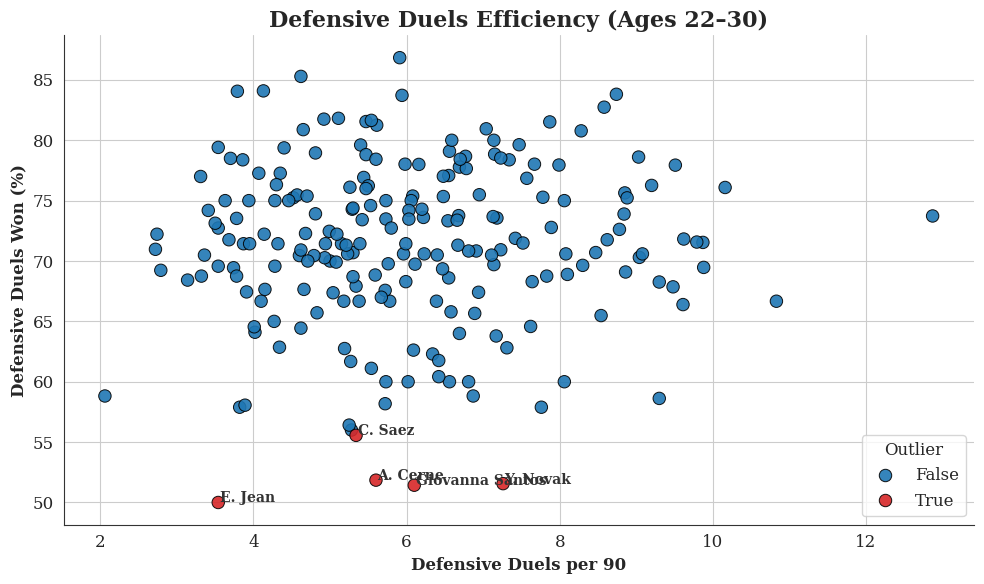

In [11]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set Washington Post-style plot aesthetics
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.edgecolor': '#333333',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

# Define the folder path
folder_path = '/Users/user/Downloads/Women/'

# Get all Excel files
excel_files = glob.glob(os.path.join(folder_path, '*.xlsx'))

# Read and concatenate all Excel files, skipping bad files
df_list = []
for file in excel_files:
    try:
        df = pd.read_excel(file, engine='openpyxl')
        df_list.append(df)
    except Exception as e:
        print(f"Skipping file {file} due to error: {e}")

# Combine all data into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Filter by position, age, and minutes played
positions = ['CB', 'LCB', 'RCB']
df = combined_df[
    combined_df['Position'].isin(positions) &
    combined_df['Age'].between(22, 30) &
    (combined_df['Minutes played'] >= 500)
]


# Drop rows with missing duel data
df = df.dropna(subset=['Defensive duels per 90', 'Defensive duels won, %', 'Player'])

# Identify outliers using IQR method (y-axis)
q1 = df['Defensive duels won, %'].quantile(0.25)
q3 = df['Defensive duels won, %'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df['Outlier'] = (df['Defensive duels won, %'] < lower_bound) | (df['Defensive duels won, %'] > upper_bound)

# Plot: Scatterplot with player name labels for outliers
plt.figure(figsize=(10, 6))
palette = {True: '#d62728', False: '#1f77b4'}

scatter = sns.scatterplot(
    data=df,
    x='Defensive duels per 90',
    y='Defensive duels won, %',
    hue='Outlier',
    palette=palette,
    s=80,
    edgecolor='black',
    alpha=0.9
)

# Label outliers
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Defensive duels per 90'] + 0.02, row['Defensive duels won, %'],
             row['Player'], fontsize=10, weight='bold', color='#333333')

plt.title("Defensive Duels Efficiency (Ages 22–30)", fontsize=16, weight='bold')
plt.xlabel("Defensive Duels per 90")
plt.ylabel("Defensive Duels Won (%)")
plt.legend(title='Outlier', loc='lower right')
sns.despine()
plt.tight_layout()
plt.show()


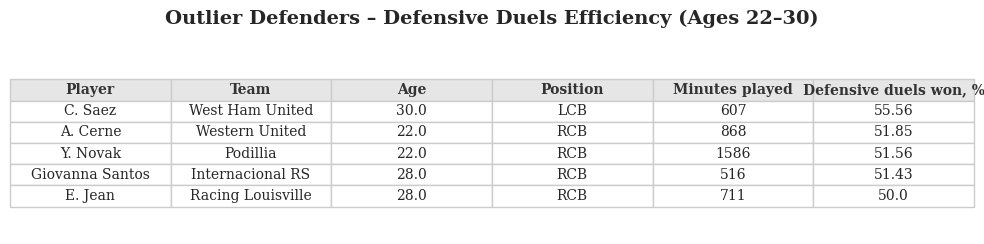

In [12]:
# Prepare outlier table
outliers_table = df[df['Outlier']][
    ['Player', 'Team', 'Age', 'Position', 'Minutes played', 'Defensive duels won, %']
].sort_values('Defensive duels won, %', ascending=False).reset_index(drop=True)

# Plot table using matplotlib (Washington Post-style)
fig, ax = plt.subplots(figsize=(10, 0.6 + 0.4 * len(outliers_table)))
ax.axis('off')

# Draw table
tbl = plt.table(
    cellText=outliers_table.values,
    colLabels=outliers_table.columns,
    cellLoc='center',
    loc='center',
    colColours=['#f2f2f2'] * len(outliers_table.columns)
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.4)

# Styling for Washington Post feel
for key, cell in tbl.get_celld().items():
    if key[0] == 0:  # Header
        cell.set_text_props(weight='bold', color='#333333')
        cell.set_facecolor('#e6e6e6')
    else:
        cell.set_facecolor('white')
    cell.set_edgecolor('#cccccc')

plt.title("Outlier Defenders – Defensive Duels Efficiency (Ages 22–30)", fontsize=14, weight='bold', pad=20)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.preprocessing import StandardScaler

# Define feature sets
defensive_features = [
    'Defensive duels per 90', 'Defensive duels won, %',
    'Aerial duels per 90', 'Aerial duels won, %',
    'Sliding tackles per 90', 'PAdj Sliding tackles',
    'Shots blocked per 90', 'Interceptions per 90', 'PAdj Interceptions'
]

passing_features = [
    'xA per 90', 'Shot assists per 90', 'Second assists per 90', 'Third assists per 90',
    'Smart passes per 90', 'Accurate smart passes, %',
    'Key passes per 90', 'Passes to final third per 90', 'Accurate passes to final third, %',
    'Passes to penalty area per 90', 'Accurate passes to penalty area, %',
    'Through passes per 90', 'Accurate through passes, %',
    'Deep completions per 90', 'Deep completed crosses per 90',
    'Progressive passes per 90', 'Accurate progressive passes, %'
]

# Drop rows with missing values in those fields
df = df.dropna(subset=defensive_features + passing_features)

# Normalize features
scaler = StandardScaler()

def_norm = pd.DataFrame(scaler.fit_transform(df[defensive_features]), columns=defensive_features, index=df.index)
pass_norm = pd.DataFrame(scaler.fit_transform(df[passing_features]), columns=passing_features, index=df.index)

# Compute mean score for each category
df['Defensive Score'] = def_norm.mean(axis=1)
df['Passing Score'] = pass_norm.mean(axis=1)

# Min-max scale Defensive Score to 0-100
df['Defensive Score'] = 100 * (df['Defensive Score'] - df['Defensive Score'].min()) / (df['Defensive Score'].max() - df['Defensive Score'].min())

# Min-max scale Passing Score to 0-100
df['Passing Score'] = 100 * (df['Passing Score'] - df['Passing Score'].min()) / (df['Passing Score'].max() - df['Passing Score'].min())



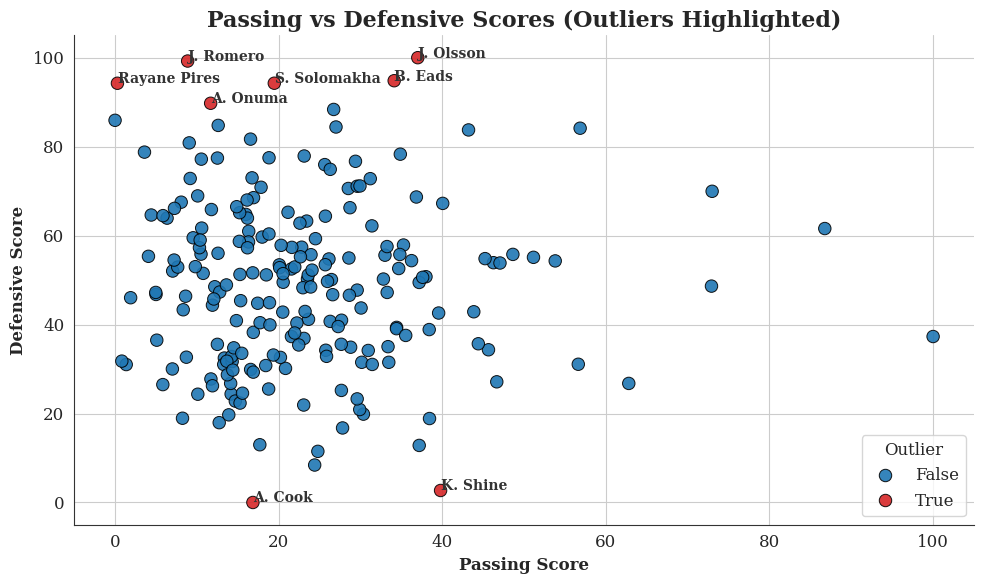

In [17]:
# Detect outliers in Defensive Score using IQR
q1 = df['Defensive Score'].quantile(0.25)
q3 = df['Defensive Score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1. * iqr
upper_bound = q3 + 1. * iqr

df['Outlier'] = (df['Defensive Score'] < lower_bound) | (df['Defensive Score'] > upper_bound)

# Washington Post–style scatterplot
plt.figure(figsize=(10, 6))
palette = {True: '#d62728', False: '#1f77b4'}  # Red = outlier, Blue = normal

sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.edgecolor': '#333333',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold'
})

sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=palette,
    s=80,
    edgecolor='black',
    alpha=0.9
)

# Label outlier players
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 0.03, row['Defensive Score'],
             row['Player'], fontsize=10, weight='bold', color='#333333')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)", fontsize=16, weight='bold')
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")
plt.legend(title='Outlier', loc='lower right')
sns.despine()
plt.tight_layout()
plt.show()


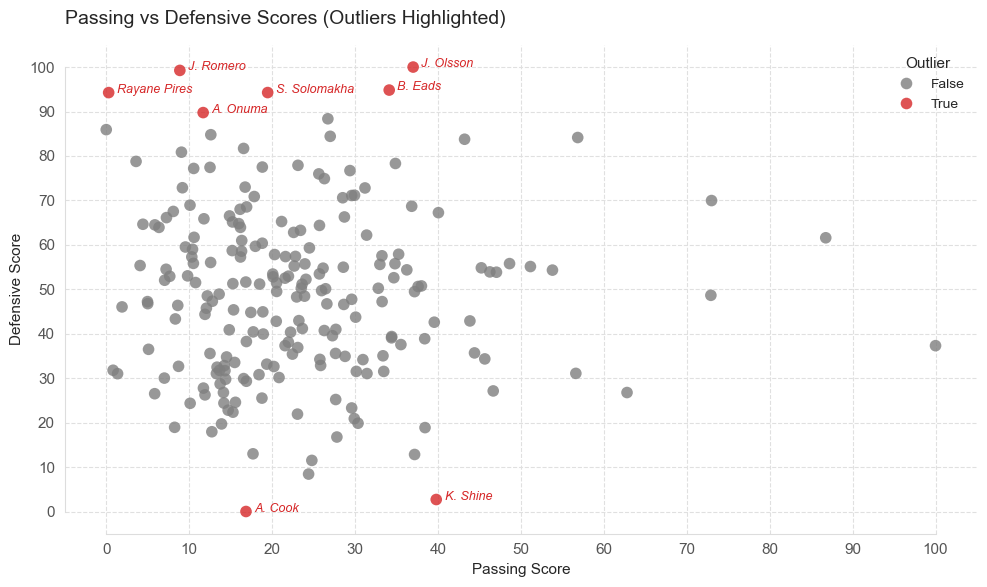

In [19]:
import matplotlib.ticker as ticker

# Detect outliers
q1 = df['Defensive Score'].quantile(0.25)
q3 = df['Defensive Score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1. * iqr
upper_bound = q3 + 1. * iqr
df['Outlier'] = (df['Defensive Score'] < lower_bound) | (df['Defensive Score'] > upper_bound)

plt.figure(figsize=(10, 6))
palette = {True: '#d62728', False: '#7f7f7f'}  # Red = outliers, gray = others

# Use seaborn whitegrid style
sns.set_style("whitegrid")

# Customize rcParams for Economist style
plt.rcParams.update({
    'font.family': 'Arial, sans-serif',
    'font.size': 11,
    'axes.edgecolor': '#dddddd',
    'axes.labelweight': 'normal',
    'axes.titlesize': 14,
    'axes.titleweight': 'normal',
    'xtick.color': '#555555',
    'ytick.color': '#555555',
    'grid.color': '#e0e0e0',
    'grid.linestyle': '--',
    'legend.frameon': False,
    'legend.fontsize': 10,
})

sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=palette,
    s=70,
    edgecolor='none',
    alpha=0.8
)

# Label outliers with red italic text
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 1, row['Defensive Score'],
             row['Player'], fontsize=9, color='#d62728', style='italic')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)", loc='left', pad=15)
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")

plt.grid(True, which='major', axis='both')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

sns.despine(trim=True)
plt.tight_layout()
plt.show()


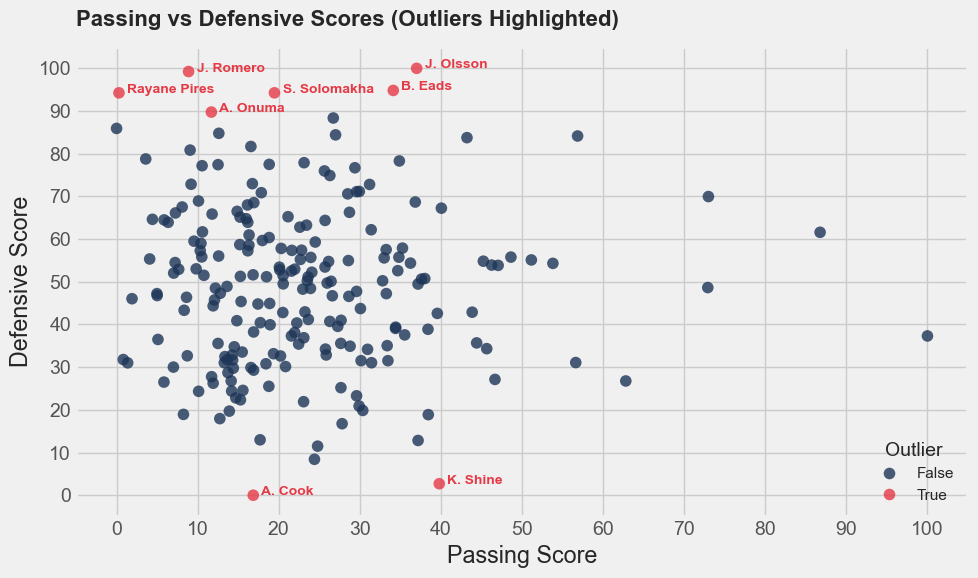

In [20]:
 import matplotlib.ticker as ticker

# Detect outliers (your existing code)
q1 = df['Defensive Score'].quantile(0.25)
q3 = df['Defensive Score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1. * iqr
upper_bound = q3 + 1. * iqr
df['Outlier'] = (df['Defensive Score'] < lower_bound) | (df['Defensive Score'] > upper_bound)

plt.style.use('fivethirtyeight')  # <-- Set fivethirtyeight style here

plt.figure(figsize=(10, 6))
palette = {True: '#e63946', False: '#1d3557'}  # FiveThirtyEight style colors (red & dark blue)

sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=palette,
    s=70,
    edgecolor='none',
    alpha=0.8
)

# Label outliers with bold font, slightly offset
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 1, row['Defensive Score'],
             row['Player'], fontsize=10, weight='bold', color='#e63946')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)", loc='left', pad=15, fontsize=16, weight='bold')
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")

plt.legend(title='Outlier', loc='lower right', frameon=False, fontsize=11)

# Major ticks every 10 units
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()


findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond' not found.
findfont: Font family 'Garamond'

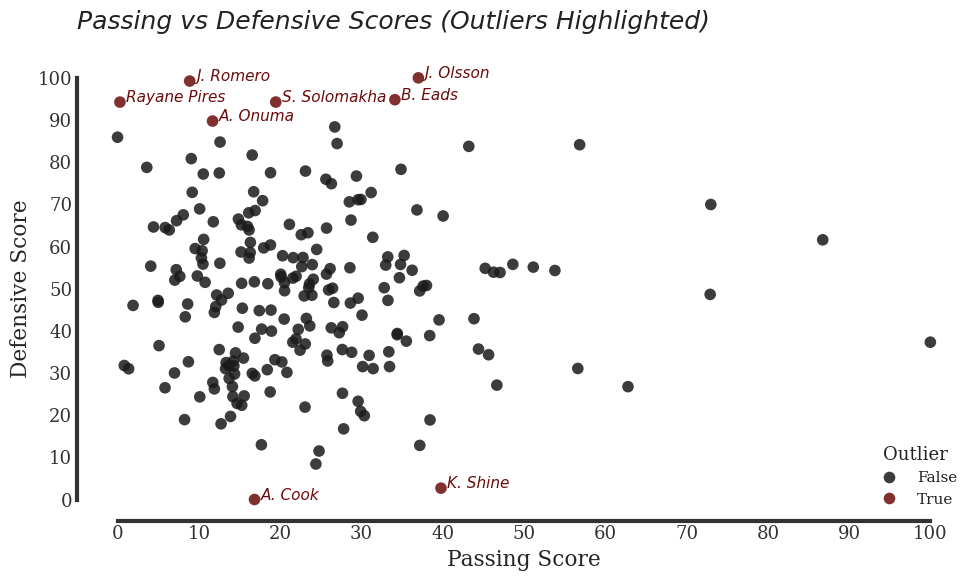

In [23]:
import matplotlib.ticker as ticker

# Detect outliers (your existing code)
q1 = df['Defensive Score'].quantile(0.25)
q3 = df['Defensive Score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1. * iqr
upper_bound = q3 + 1. * iqr
df['Outlier'] = (df['Defensive Score'] < lower_bound) | (df['Defensive Score'] > upper_bound)

plt.figure(figsize=(10, 6))

# Palette: black for normal, deep burgundy for outliers (subtle, refined)
palette = {True: '#6b0b0b', False: '#1a1a1a'}

# Set white background, no gridlines
sns.set_style("white")
plt.rcParams.update({
    'font.family': 'Garamond, serif',
    'font.size': 13,
    'axes.edgecolor': '#333333',
    'axes.labelweight': 'normal',
    'axes.titlesize': 16,
    'axes.titleweight': 'normal',
    'axes.titlelocation': 'left',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'grid.color': 'none',
    'legend.frameon': False,
    'legend.fontsize': 11,
    'text.color': '#222222',
})

sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=palette,
    s=70,
    edgecolor='none',
    alpha=0.85
)

# Label outliers with classic serif, burgundy color, smaller font
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 0.8, row['Defensive Score'],
             row['Player'], fontsize=11, family='Garamond', color='#6b0b0b', style='italic')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)",
          loc='left', pad=20, fontsize=18, family='Garamond', weight='normal', style='italic')
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")

plt.legend(title='Outlier', loc='lower right', frameon=False)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(10))

# Remove grid lines entirely for minimalism
plt.grid(False)

sns.despine(trim=True)
plt.tight_layout()
plt.show()


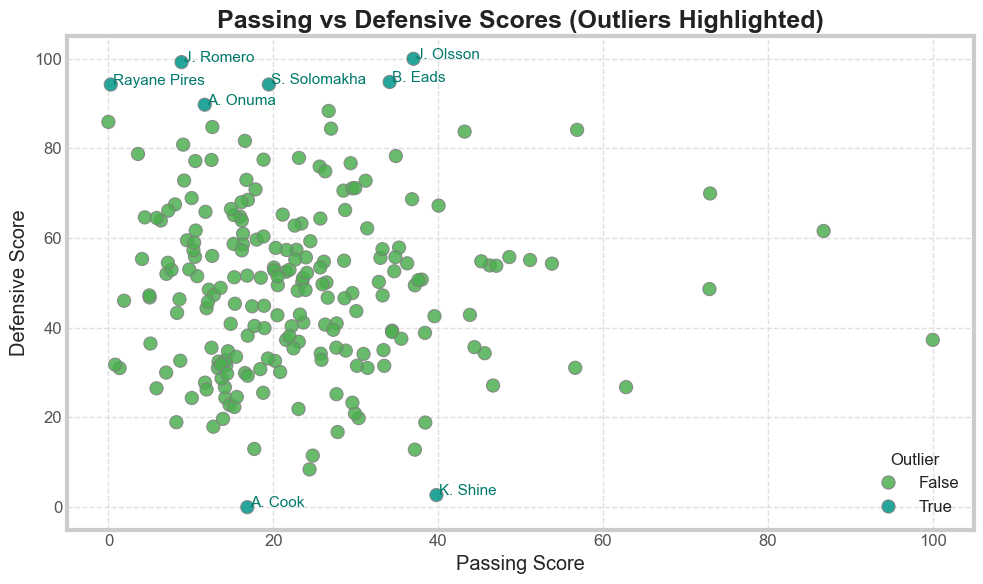

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define palette inspired by Guardian
guardian_palette = {True: '#009688', False: '#4caf50'}  # Teal for outliers, green for normal

# Set style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Arial, sans-serif',
    'font.size': 12,
    'axes.edgecolor': '#cccccc',
    'axes.labelweight': 'normal',
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.titlelocation': 'center',
    'xtick.color': '#555555',
    'ytick.color': '#555555',
    'grid.color': '#e0e0e0',
    'grid.linestyle': '--',
    'legend.frameon': False,
    'legend.fontsize': 12,
    'text.color': '#222222',
})

plt.figure(figsize=(10, 6))

# Scatterplot
sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=guardian_palette,
    s=90,
    edgecolor='gray',
    linewidth=0.8,
    alpha=0.85
)

# Label outliers with clean font and subtle dark green color
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 0.3, row['Defensive Score'],
             row['Player'], fontsize=11, family='Arial', color='#00796b')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)", fontsize=18, weight='bold')
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")

plt.legend(title='Outlier', loc='lower right')
plt.tight_layout()
plt.show()


findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not found.
findfont: Font family 'Roboto' not

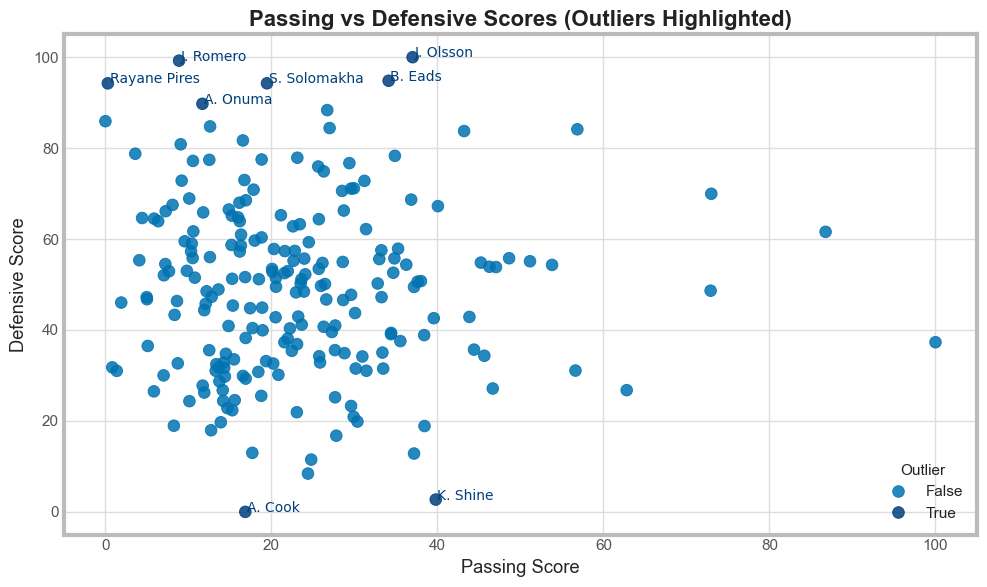

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statista-inspired palette (blue for normal, darker blue for outliers)
statista_palette = {False: '#0073b1', True: '#003f7d'}

# Set style
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.family': 'Roboto, Arial, sans-serif',
    'font.size': 11,
    'axes.edgecolor': '#bbbbbb',
    'axes.labelweight': 'normal',
    'axes.titlesize': 15,
    'axes.titleweight': 'bold',
    'xtick.color': '#555555',
    'ytick.color': '#555555',
    'grid.color': '#dddddd',
    'grid.linestyle': '-',
    'legend.frameon': False,
    'legend.fontsize': 11,
    'text.color': '#222222',
})

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=df,
    x='Passing Score',
    y='Defensive Score',
    hue='Outlier',
    palette=statista_palette,
    s=70,
    edgecolor=None,
    alpha=0.85
)

# Label outliers clearly but subtly
for _, row in df[df['Outlier']].iterrows():
    plt.text(row['Passing Score'] + 0.2, row['Defensive Score'],
             row['Player'], fontsize=10, family='Roboto', color='#003f7d')

plt.title("Passing vs Defensive Scores (Outliers Highlighted)", fontsize=16, weight='bold')
plt.xlabel("Passing Score")
plt.ylabel("Defensive Score")

plt.legend(title='Outlier', loc='lower right')
plt.tight_layout()
plt.show()
